In [39]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import tensorflow as tf
tf=tf.compat.v1
tf.disable_eager_execution()


# Input data file
DATA_FILE = "./slr05.xls"

# Read in data (DO NOT REVISE)
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

dataset = tf.data.Dataset.from_tensor_slices((data[:,0],data[:,1]))

print(dataset.output_types)
print(dataset.output_shapes)

(tf.float64, tf.float64)
(TensorShape([]), TensorShape([]))


In [42]:
# X=tf.placeholder(tf.float32)
# y=tf.placeholder(tf.float32)
it=dataset.make_initializable_iterator()
X, y = it.get_next()

w=tf.Variable(0.0,dtype=tf.float64)
b=tf.Variable(0.0,dtype=tf.float64)

y_pred=tf.multiply(w,X)+b
print(y_pred.dtype)

loss=tf.square(y-y_pred)

#delta=14.0
#loss23=tf.cond(tf.abs(y-y_pred)<delta,lambda :0.5*tf.square(y-y_pred),lambda:delta*tf.abs(y-y_pred)-0.5*tf.square(delta))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


<dtype: 'float64'>


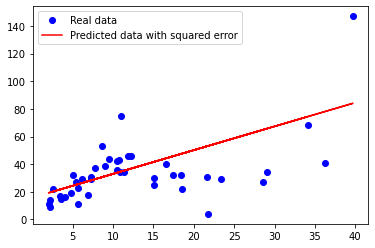

In [43]:
with tf.Session() as s:
    s.run([w.initializer,b.initializer])

    for i in range(100):
        s.run(it.initializer)
        try:
            while True:
                s.run([optimizer])
        except tf.errors.OutOfRangeError:
            pass
        # for xx,yy in data:
        #     s.run(optimizer,feed_dict={X:xx,y:yy})
    w_out, b_out = s.run([w, b])
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
plt.legend()
plt.show()

In [69]:
def print_data(d):
    # ii = d.make_initializable_iterator()
    with tf.Session() as sess:
        sess.run(it.initializer)

        for i in range(5):
            print(sess.run(it.get_next()))
# print_data(dataset)
dataset = dataset.shuffle(5)
print_data(dataset)
dataset = dataset.repeat(3)
print_data(dataset)
# dataset = dataset.batch(128)
# print_data()
# dataset = dataset.map(lambda x: tf.one_hot(x, 10))
# print_data()
# convert each elem of dataset to one_hot vector



(6.2, 29.0)
(9.5, 44.0)
(10.5, 36.0)
(7.7, 37.0)
(8.6, 53.0)
(6.2, 29.0)
(9.5, 44.0)
(10.5, 36.0)
(7.7, 37.0)
(8.6, 53.0)
